In [1472]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [1080]:
data = pd.read_csv("cars_price (1).csv")

In [1081]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [1082]:
data.shape

(205, 26)

In [1083]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [1084]:
numericCorr = data.corr()
numericCorr

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


In [1085]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

 Feature Selection

In [1086]:
columns = ["body-style","num-of-doors","peak-rpm","aspiration","engine-type","fuel-system","drive-wheels",
           "engine-location","num-of-cylinders","fuel-type","bore","stroke","horsepower"]
pValues = {}
for col in columns:
    CrossTab = pd.crosstab(data.loc[:,col],data["price"])
    g,p,dof,expctd = stats.chi2_contingency(CrossTab)
    pValues[col] = p

In [1087]:
pValues

{'body-style': 0.16836092793956492,
 'num-of-doors': 0.1461543046416186,
 'peak-rpm': 0.22825913754576305,
 'aspiration': 0.2838831272296841,
 'engine-type': 0.9609642940693653,
 'fuel-system': 0.0439193017532106,
 'drive-wheels': 0.45041409214649725,
 'engine-location': 0.1616456057739124,
 'num-of-cylinders': 0.09264587294968095,
 'fuel-type': 0.3352830796978861,
 'bore': 0.721448268503809,
 'stroke': 0.0005668043500952159,
 'horsepower': 0.0018724219664754556}

In [1088]:
#From the p values oof the test of independence is less than 0.05 for 3 features we will accept the NUll Hypothesis 
#and drop this feature as we accept the NULL hypothesis that this feature does not have any significant effect on the price.

In [1089]:
data.drop(["stroke","horsepower","fuel-system"],axis = 1,inplace = True)

In [1090]:
#Since predicting the price is a regression problem we need to convert the "price" column from object to numeric

In [1091]:
data["price"].isna().sum()
#data["price"] = pd.to_numeric(data["price"])

0

In [1092]:
#even though there are no Nan values, we are not able to do the to_numeric conversion because there is a "?" 
#value present in that column

In [1093]:
data[data["price"] =="?"]["price"]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [1094]:
data['price'].value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [1095]:
#Since all the values are string we can only use mode to fill the "?", but then that will result into it replaced by "?" only.
#Hence for now we will replace "?" with a dummy numeric value 0

In [1096]:
data.loc[data["price"] == "?","price"] = 0

In [1097]:
data["price"] = pd.to_numeric(data["price"])
data['price'].dtype

dtype('int64')

In [1098]:
data[data["price"] == 0]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,curb-weight,engine-type,num-of-cylinders,engine-size,bore,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,3053,ohc,five,131,3.13,7.0,5500,16,22,0
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,1874,ohc,four,90,3.03,9.6,5400,38,43,0
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,1909,ohc,four,90,3.03,9.6,5400,38,43,0
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,3366,dohcv,eight,203,3.94,10.0,5750,17,28,0


In [1099]:
#Now that the column has been converted to numeric datatype we will replace the dummy 0 value with the actula mean 
#of that price feature

In [1100]:
data.loc[data["price"] == 0,"price"] = data["price"].mean()
data["price"].value_counts()

12949.429268    4
8921.000000     2
18150.000000    2
8845.000000     2
8495.000000     2
               ..
45400.000000    1
16503.000000    1
5389.000000     1
6189.000000     1
22625.000000    1
Name: price, Length: 187, dtype: int64

In [1101]:
numericCorr = data.corr()
numericCorr["price"]

symboling           -0.082028
wheel-base           0.583379
length               0.683376
width                0.728409
height               0.134938
curb-weight          0.820823
engine-size          0.861719
compression-ratio    0.071166
city-mpg            -0.667642
highway-mpg         -0.690822
price                1.000000
Name: price, dtype: float64

In [1109]:
#Dropping features symboling adn compression ratio since their correlation with price is very less as compared to other features.
data.drop(["symboling","compression-ratio"],axis = 1, inplace = True)
numericCorr.drop(["symboling","compression-ratio"],axis = 1, inplace = True)

In [1110]:
numericFeatures  = numericCorr.columns 
numericFeatures
data.loc[:,numericFeatures]

,wheel-base,length,width,height,curb-weight,engine-size,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,18,22,17450.0
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,26,27,22470.0


In [1111]:
data.loc[:,data.dtypes == "object"]

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,bore,peak-rpm
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,3.47,5000
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,3.47,5000
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,2.68,5000
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,3.19,5500
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,3.19,5500
...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,3.78,5400
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,3.78,5300
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,3.58,5500
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,3.01,4800


Feature Enginerring - Converting from Categorical to Numerical by using various methods as needed

In [1028]:
#We will do the similar steps as the "Price" for the other categorical feqatures since all of these need to be numeric 

In [1112]:
data['bore'].value_counts()
#It has four missing values

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64

In [1113]:
data[data["bore"] =="?"][["bore","peak-rpm"]]

,bore,peak-rpm
55,?,6000
56,?,6000
57,?,6000
58,?,6000


In [1114]:
data.loc[(57,58),"bore"] = 3.62
data.loc[(55,56),"bore"] = 3.19

In [1115]:
data["bore"] = pd.to_numeric(data["bore"])
data['bore'].dtype

dtype('float64')

In [1116]:
data.loc[(55,56,57,58),"bore"] = data["bore"].median()

In [1117]:
data[data["peak-rpm"] =="?"]["peak-rpm"]

130    ?
131    ?
Name: peak-rpm, dtype: object

In [1118]:
data['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
4500     7
5800     7
4200     5
4150     5
4750     4
4350     4
5100     3
4250     3
5900     3
4400     3
?        2
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [1119]:
data.loc[data["peak-rpm"] == "?","peak-rpm"] = data["peak-rpm"].mode()

In [1120]:
data["peak-rpm"] = pd.to_numeric(data["peak-rpm"])
data['peak-rpm'].dtype

dtype('float64')

In [1328]:
modeRPM = data["peak-rpm"].mode()
modeRPM[0]

5500.0

In [1331]:
data["peak-rpm"].fillna(modeRPM[0],inplace= True)

In [1121]:
data.loc[:,data.dtypes == "object"]

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five
...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six


In [1122]:
fuelType_ENC = OneHotEncoder(sparse = False,dtype = np.int32)
fuelType = fuelType_ENC.fit_transform(data[["fuel-type"]])
fuelType_ENC.categories_

[array(['diesel', 'gas'], dtype=object)]

In [1123]:
fuelType[:,0].size

205

In [1124]:
data.insert(loc = 3,column="Diesel",value = fuelType[:,0])
data.insert(loc = 4,column="Gas",value = fuelType[:,1])

In [1125]:
data.drop("fuel-type",axis =1 , inplace = True)

In [1126]:
aspiration_ENC = OneHotEncoder(sparse = False,dtype = np.int32)
aspiration = aspiration_ENC.fit_transform(data[["aspiration"]])
aspiration_ENC.categories_

[array(['std', 'turbo'], dtype=object)]

In [1127]:
data.insert(loc = 5,column="Std",value = aspiration[:,0])
data.insert(loc = 6,column="Turbo",value = aspiration[:,1])

In [1128]:
data.drop("aspiration",axis =1 , inplace = True)

In [1129]:
bodyStyle_ENC = OneHotEncoder(sparse = False,dtype = np.int32)
bodyStyle = bodyStyle_ENC.fit_transform(data[["body-style"]])
bodyStyle_ENC.categories_

[array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object)]

In [1130]:
data.insert(loc = 8,column="Convertible",value = bodyStyle[:,0])
data.insert(loc = 9,column="Hardtop",value = bodyStyle[:,1])
data.insert(loc = 10,column="Hatchback",value = bodyStyle[:,2])
data.insert(loc = 11,column="Sedan",value = bodyStyle[:,3])
data.insert(loc = 12,column="Wagon",value = bodyStyle[:,4])

In [1131]:
data.drop("body-style",axis =1 , inplace = True)

In [1132]:
data.loc[data["num-of-doors"] == "?","num-of-doors"] = data["num-of-doors"].mode()

In [1133]:
data["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [1134]:
data["num-of-doors"].isna().sum()

2

In [1135]:
modeVal = data["num-of-doors"].mode()
modeVal[0]

'four'

In [1136]:
data["num-of-doors"].fillna(value = modeVal[0],inplace = True)

In [1137]:
noOfDoors_ENC = OneHotEncoder(sparse = False,dtype = np.int32)
noOfDoors = noOfDoors_ENC.fit_transform(data[["num-of-doors"]])
noOfDoors_ENC.categories_

[array(['four', 'two'], dtype=object)]

In [1138]:
data.insert(loc = 7,column="Four_door",value = noOfDoors[:,0])
data.insert(loc = 8,column="Two_door",value = noOfDoors[:,1])

In [1139]:
data.drop("num-of-doors",axis =1 , inplace = True)

In [1140]:
driveWheels_ENC = OneHotEncoder(sparse = False,dtype = np.int32)
driveWheels = driveWheels_ENC.fit_transform(data[["drive-wheels"]])
driveWheels_ENC.categories_

[array(['4wd', 'fwd', 'rwd'], dtype=object)]

In [1141]:
data.insert(loc = 7,column="4WD",value = driveWheels[:,0])
data.insert(loc = 8,column="FWD",value = driveWheels[:,1])
data.insert(loc = 9,column ="RWD",value = driveWheels[:,2])

In [1142]:
data.drop("drive-wheels",axis =1 , inplace = True)

In [1143]:
data['num-of-cylinders'].isna().sum()
#"num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                 # "two": 2, "twelve": 12, "three":3 }}

0

In [1144]:
data['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [1145]:
cylinderMap = {"num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [1146]:
data.replace(cylinderMap,inplace = True)

In [1147]:
data['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

In [1148]:
#Dropping this feature since most of the values in this feature are unknown "?"
data["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [1160]:
data.drop("normalized-losses",axis =1 , inplace = True)

In [1149]:
make_ENC = OneHotEncoder(sparse = False,dtype = np.int32)
make = make_ENC.fit_transform(data[["make"]])
make_ENC.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)]

In [1150]:
data.insert(loc = 7,column="alfa-romero",value = make[:,0])
data.insert(loc = 8,column="audi",value = make[:,1])
data.insert(loc = 9,column ="bmw",value = make[:,2])
data.insert(loc = 10,column="chevrolet",value = make[:,3])
data.insert(loc = 11,column="dodge",value = make[:,4])
data.insert(loc = 12,column ="honda",value = make[:,5])
data.insert(loc = 13,column="isuzu",value = make[:,6])
data.insert(loc = 14,column="jaguar",value = make[:,7])
data.insert(loc = 15,column ="mazda",value = make[:,8])
data.insert(loc = 16,column="mercedes_benz",value = make[:,9])
data.insert(loc = 17,column="mercury",value = make[:,10])
data.insert(loc = 18,column ="mitsubishi",value = make[:,11])
data.insert(loc = 19,column="nissan",value = make[:,12])
data.insert(loc = 20,column="peugot",value = make[:,13])
data.insert(loc = 21,column ="plymouth",value = make[:,14])
data.insert(loc = 22,column="porsche",value = make[:,15])
data.insert(loc = 23,column="renault",value = make[:,16])
data.insert(loc = 24,column ="saab",value = make[:,17])
data.insert(loc = 25,column="subaru",value = make[:,18])
data.insert(loc = 26,column="toyota",value = make[:,19])
data.insert(loc = 27,column ="volkswagen",value = make[:,20])
data.insert(loc = 28,column="volvo",value = make[:,21])

In [1151]:
data.drop("make",axis =1 , inplace = True)

In [1152]:
data["engine-location"].value_counts()
#Since only 3 of the records have rear this feature wont make much difference in the overall vairation of the target variable
#Hence dropping the feature for now.

front    202
rear       3
Name: engine-location, dtype: int64

In [1159]:
data.drop("engine-location",axis = 1,inplace = True)

In [1153]:
data["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [1154]:
engineType_ENC = OneHotEncoder(sparse = False,dtype = np.int32)
engineType = engineType_ENC.fit_transform(data[["engine-type"]])
engineType_ENC.categories_

[array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]

In [1155]:
data.insert(loc = 29,column="dohc",value = engineType[:,0])
data.insert(loc = 30,column="dohcv",value = engineType[:,1])
data.insert(loc = 31,column ="l",value = engineType[:,2])
data.insert(loc = 32,column="ohc",value = engineType[:,3])
data.insert(loc = 33,column="ohcf",value = engineType[:,4])
data.insert(loc = 34,column ="ohcv",value = engineType[:,5])
data.insert(loc = 35,column="rotor",value = engineType[:,6])

In [1156]:
data.drop("engine-type",axis =1 , inplace = True)

In [1165]:
data.shape

(205, 55)

In [891]:
temp = finalCorr.loc[finalCorr["price"] > abs(0.05),["price"]]
temp.shape[0]

29

In [1361]:
y = data["price"]
X = data.loc[:,[col for col in data.columns]]
X.drop("price",axis = 1 , inplace = True)
X.head()

,Diesel,Gas,Std,Turbo,Four_door,alfa-romero,audi,bmw,chevrolet,dodge,...,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,peak-rpm,city-mpg,highway-mpg
0,0,1,1,0,0,1,0,0,0,0,...,168.8,64.1,48.8,2548,4,130,3.47,5000.0,21,27
1,0,1,1,0,0,1,0,0,0,0,...,168.8,64.1,48.8,2548,4,130,3.47,5000.0,21,27
2,0,1,1,0,0,1,0,0,0,0,...,171.2,65.5,52.4,2823,6,152,2.68,5000.0,19,26
3,0,1,1,0,1,0,1,0,0,0,...,176.6,66.2,54.3,2337,4,109,3.19,5500.0,24,30
4,0,1,1,0,1,0,1,0,0,0,...,176.6,66.4,54.3,2824,5,136,3.19,5500.0,18,22


In [1362]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [1363]:
numericFeaturesList = list(numericFeatures)
#X.loc[:,numericFeatures]
numericFeaturesList

['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'city-mpg',
 'highway-mpg',
 'price']

In [1364]:
numericFeaturesList.pop()

'price'

In [1365]:
numX_train = X_train.loc[:,numericFeaturesList]
numX_train.head()

,wheel-base,length,width,height,curb-weight,engine-size,city-mpg,highway-mpg
46,96.0,172.6,65.2,51.4,2734,119,24,29
183,97.3,171.7,65.5,55.7,2209,109,27,34
98,95.1,162.4,63.8,53.3,2008,97,31,37
197,104.3,188.8,67.2,57.5,3042,141,24,28
101,100.4,181.7,66.5,55.1,3095,181,17,22


In [1366]:
stdScaler = StandardScaler()
tr_NumX_train = stdScaler.fit_transform(numX_train)
tr_NumX_test = stdScaler.transform(numX_test)
tr_NumX_train[:,0].shape

(164,)

In [1367]:
X_train.drop(numericFeaturesList,axis =1 , inplace = True)
X_test.drop(numericFeaturesList,axis =1 , inplace = True)

In [1368]:
tr_NumdfXtrain = pd.DataFrame(tr_NumX_train)
tr_NumdfXtest = pd.DataFrame(tr_NumX_test)
tr_NumdfXtrain.shape

(164, 8)

In [1369]:
X_train.shape

(164, 46)

In [1370]:
for i in range(8):
    X_train.insert(loc = i,column=str(i),value = tr_NumX_train[:,i])

In [1371]:
for i in range(8):
    X_test.insert(loc = i,column=str(i),value = tr_NumX_test[:,i])

In [1372]:
X_train.isna().sum()

0                   0
1                   0
2                   0
3                   0
4                   0
5                   0
6                   0
7                   0
Diesel              0
Gas                 0
Std                 0
Turbo               0
Four_door           0
alfa-romero         0
audi                0
bmw                 0
chevrolet           0
dodge               0
honda               0
isuzu               0
jaguar              0
mazda               0
mercedes_benz       0
mercury             0
mitsubishi          0
nissan              0
peugot              0
plymouth            0
porsche             0
renault             0
saab                0
subaru              0
toyota              0
volkswagen          0
volvo               0
4WD                 0
dohc                0
dohcv               0
l                   0
ohc                 0
ohcf                0
ohcv                0
rotor               0
FWD                 0
RWD                 0
Two_door  

In [1373]:
X_test.head()

,0,1,2,3,4,5,6,7,Diesel,Gas,...,RWD,Two_door,Convertible,Hardtop,Hatchback,Sedan,Wagon,num-of-cylinders,bore,peak-rpm
154,-0.512397,-0.368043,-1.115607,2.256563,-0.544005,-0.866771,0.276632,0.199328,0,1,...,0,0,0,0,0,0,1,4,3.05,4800.0
21,-0.847124,-1.385100,-1.020489,-1.167778,-1.337640,-0.914409,1.788889,1.501134,0,1,...,0,1,0,0,1,0,0,4,2.97,5500.0
198,0.926928,1.198553,0.596518,1.060107,0.903324,0.038342,-1.235624,-1.247123,0,1,...,1,0,0,0,0,1,0,4,3.62,5100.0
48,2.382989,2.084377,1.737934,-0.342635,2.860573,3.087147,-1.538075,-1.681058,0,1,...,1,0,0,0,0,1,0,6,3.63,4750.0
34,-0.847124,-1.983852,-0.925371,-0.425150,-1.184280,-0.866771,0.730309,0.488618,0,1,...,0,1,0,0,1,0,0,4,2.91,6000.0


Model Selection

In [1375]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.945721926632431

In [1399]:
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.956882373272685

In [1401]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.9489440209843447

In [1403]:
elasticNet = ElasticNet()
elasticNet.fit(X_train,y_train)
elasticNet.score(X_test,y_test)

0.8540366595135309

In [1382]:
sgd = SGDRegressor()
sgd.fit(X_train,y_train)
sgd.score(X_test,y_test)

-4.190469583715589e+24

In [1396]:
sgd = SGDRegressor(penalty = "l1")
sgd.fit(X_train,y_train)
sgd.score(X_test,y_test)

-6.449872688478639e+24

In [1397]:
sgd = SGDRegressor(penalty = "elasticnet")
sgd.fit(X_train,y_train)
sgd.score(X_test,y_test)

-1.746539604866227e+24

In [1384]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.3352269575606336

In [1386]:
svr = SVR()
svr.fit(X_train,y_train)
svr.score(X_test,y_test)

-0.04515362739323314

In [1390]:
forest = RandomForestRegressor()
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.971219740384059

In [1392]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.9654803949764794

In [1404]:
#From the above results we can see that the Ridge LinearRegressor, RandomForest and the GradientBossting Regressors give the best 
#scores on test data, so we will further tune the the hyperparamters of these models and then select one best from them.

In [1394]:
testDataScores = {}

In [1407]:
ridgeLinearRegParams = {"alpha" : [0.3,0.5,0.8,1,1.5,2,2.5,3], "max_iter" : [None,500,1000,1500,2000]}

rcvRidgeReg = RandomizedSearchCV(ridge,ridgeLinearRegParams)
rcvRidgeReg.fit(X_train,y_train)

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': [0.3, 0.5, 0.8, 1, 1.5, 2, 2.5,
                                                  3],
                                        'max_iter': [None, 500, 1000, 1500,
                                                     2000]})

In [1410]:
bestParamsRidge = rcvRidgeReg.best_params_
bestParamsRidge

{'max_iter': None, 'alpha': 0.5}

In [1412]:
rcv_Ridge = Ridge(alpha = bestParamsRidge["alpha"],max_iter = bestParamsRidge["max_iter"])
rcv_Ridge.fit(X_train,y_train)
testDataScores["Ridge"] = rcv_Ridge.score(X_test,y_test)

In [1443]:
lassoLinearRegParams = {"alpha" : [0.3,0.5,0.8,1,1.5,2,2.5,3], "max_iter" : [5000,1500,2000,2500]}

rcvLassoReg = RandomizedSearchCV(lasso,lassoLinearRegParams)
rcvLassoReg.fit(X_train,y_train)

RandomizedSearchCV(estimator=Lasso(),
                   param_distributions={'alpha': [0.3, 0.5, 0.8, 1, 1.5, 2, 2.5,
                                                  3],
                                        'max_iter': [5000, 1500, 2000, 2500]})

In [1444]:
bestParamsLasso = rcvLassoReg.best_params_
bestParamsLasso

{'max_iter': 5000, 'alpha': 2.5}

In [1445]:
rcv_Lasso = Lasso(alpha = bestParamsLasso["alpha"],max_iter = bestParamsLasso["max_iter"])
rcv_Lasso.fit(X_train,y_train)
testDataScores["Lasso"] = rcv_Lasso.score(X_test,y_test)

In [1416]:
forestParams = {"n_estimators" : [50,100,200,300,500,600],"min_samples_split" : [2,4,6,8,10,12,14],
                 "min_samples_leaf" :[1,3,5,7,9,11],"max_depth" : [3,4,5,6],"max_features":[None]}

rcvforest = RandomizedSearchCV(forest,forestParams)
rcvforest.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'max_features': [None],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [50, 100, 200, 300, 500,
                                                         600]})

In [1417]:
bestParamsforest = rcvforest.best_params_
bestParamsforest

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 5}

In [1427]:
rcv_forest = RandomForestRegressor(n_estimators = bestParamsforest["n_estimators"],min_samples_split = bestParamsforest["min_samples_split"],
                                   min_samples_leaf = bestParamsforest["min_samples_leaf"],
                                   max_depth = bestParamsforest["max_depth"],max_features = bestParamsforest["max_features"])

rcv_forest.fit(X_train,y_train)
testDataScores["Forest"] = rcv_forest.score(X_test,y_test)

In [1420]:
gbParams = {"learning_rate" :[0.1,0.001,0.0001],"n_estimators" : [100,500,1000,2000],
                 "subsample" : [0.2,0.4,0.5,0.8,1], "min_samples_split" : [2,4,6,8,10,12],
                 "min_samples_leaf" :[1,3,5,7,9,11], "max_depth" : [3,4,5,6,7]}

rcvgb = RandomizedSearchCV(gb,gbParams)
rcvgb.fit(X_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.001, 0.0001],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12],
                                        'n_estimators': [100, 500, 1000, 2000],
                                        'subsample': [0.2, 0.4, 0.5, 0.8, 1]})

In [1422]:
bestParamsgb = rcvgb.best_params_
bestParamsgb

{'subsample': 0.8,
 'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 3,
 'learning_rate': 0.1}

In [1425]:
rcv_gb = GradientBoostingRegressor(learning_rate = bestParamsgb["learning_rate"],n_estimators = bestParamsgb["n_estimators"],
                                        subsample = bestParamsgb["subsample"],
                                        min_samples_split = bestParamsgb["min_samples_split"],min_samples_leaf = bestParamsgb["min_samples_leaf"],
                                        max_depth = bestParamsgb["max_depth"])
rcv_gb.fit(X_train,y_train)
testDataScores["Gboost"] = rcv_gb.score(X_test,y_test)

In [1446]:
testDataScores

{'Ridge': 0.9585622086182325,
 'Gboost': 0.9643827413502571,
 'Forest': 0.9629335192937455,
 'Lasso': 0.9525040077474227}

<BarContainer object of 4 artists>

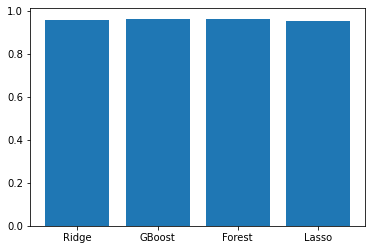

In [1484]:
x = ["Ridge","GBoost","Forest","Lasso"]
plt.bar(x,testDataScores.values())

Final Model Creation and Validating its score

In [1447]:
#From the testData Scores we can see that GBOsst model has the best perfromance on the test data after hyperparamter tunning

In [1465]:
finalModel = GradientBoostingRegressor(learning_rate = bestParamsgb["learning_rate"],n_estimators = bestParamsgb["n_estimators"],
                                        subsample = bestParamsgb["subsample"],
                                        min_samples_split = bestParamsgb["min_samples_split"],min_samples_leaf = bestParamsgb["min_samples_leaf"],
                                        max_depth = bestParamsgb["max_depth"])
finalModel.fit(X_train,y_train)
R2Score = finalModel.score(X_test,y_test)

In [1466]:
y_pred = finalModel.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [1470]:
print("R2 Score : ", round(R2Score,2))
print("Mean Absolute Error : ", round(MAE,2))
print("Mean Squared Error :", round(MSE,2))

R2 Score :  0.97
Mean Absolute Error :  1113.57
Mean Squared Error : 2101235.3
